In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Ypred=np.ones((14,2)).astype(np.uint8)

In [4]:
np.savetxt('./a.txt',Ypred,fmt='%d')

In [9]:
X = pd.read_csv('./cifar_test.csv',header=None).values.reshape((-1,3,32,32))

In [10]:
X.shape

(100, 3, 32, 32)

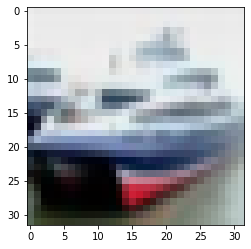

In [13]:
plt.imshow(X[1].transpose((1,2,0))/255.)

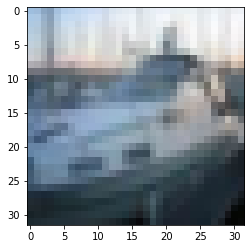

In [14]:
plt.imshow(X[2].transpose((1,2,0))/255.)

In [19]:
def SavePlots(y1, y2, metric, exp_name, path):
    try:
        plt.clf()
    except Exception as e:
        pass
    plt.title(exp_name)
    plt.xlabel('epochs')
    plt.ylabel(metric)
    epochs=np.arange(1,len(y1)+1,1)
    plt.plot(epochs,y1,label='train %s'%metric)
    plt.plot(epochs,y2,label='val %s'%metric)
    ep=np.argmax(y2)
    plt.plot(ep+1,y2[ep],'r*',label='bestacc = %i'%(y2[ep]))
    plt.grid()
    plt.legend()
    plt.savefig(path+'%s_%s'%(exp_name,metric), dpi=95)

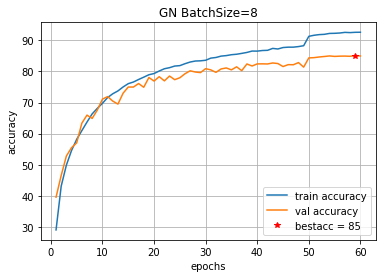

In [21]:
stats=np.load('gn_BatchSizeVariant_accs.npy')
SavePlots(stats[0], stats[1], 'accuracy', 'GN BatchSize=8', path='./')

In [22]:
x=pd.read_csv('bn_Batchsize.txt',header=None, delimiter=' ')
train_acc=list(x[5].values)
val_acc=list(x[8].values)

In [23]:
train_acc[-1]

94.325

In [24]:
val_acc[-1]

88.46000000000002

In [25]:
train_acc+=[94.32, 94.33, 94.31, 94.34]
val_acc+=[88.461, 88.462, 88.46, 88.46]

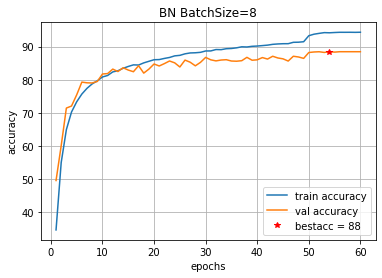

In [26]:
SavePlots(train_acc, val_acc, 'accuracy', 'BN BatchSize=8', path='./')

# Plots

In [27]:
path='./COL870_Assignment1/ForReport/'

In [28]:
stats=np.load(path+'gn_accs.npy')

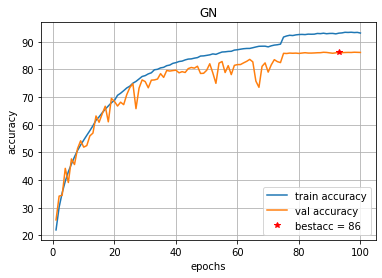

In [30]:
SavePlots(stats[0], stats[1], 'accuracy', 'GN', path=path)

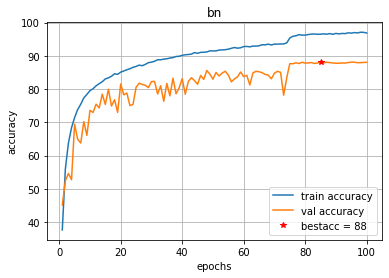

In [15]:
stats=np.load(path+'bn_accs.npy')
SavePlots(stats[0], stats[1], 'accuracy', 'bn', path=path)

In [22]:
variants=['torch_bn', 'nn', 'bn', 'in', 'bin', 'ln', 'gn']
variants_path=[path+x+'_accs.npy' for x in variants]
variants_path

['./COL870_Assignment1/ForReport/torch_bn_accs.npy',
 './COL870_Assignment1/ForReport/nn_accs.npy',
 './COL870_Assignment1/ForReport/bn_accs.npy',
 './COL870_Assignment1/ForReport/in_accs.npy',
 './COL870_Assignment1/ForReport/bin_accs.npy',
 './COL870_Assignment1/ForReport/ln_accs.npy',
 './COL870_Assignment1/ForReport/gn_accs.npy']

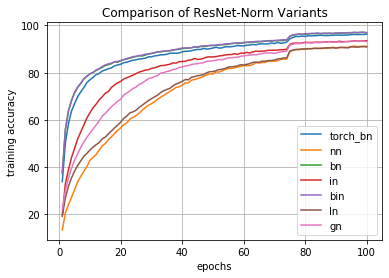

In [30]:
plt.title('Comparison of ResNet-Norm Variants')
plt.xlabel('epochs')
plt.ylabel('training accuracy')
for i,variant in enumerate(variants):
    train_acc = np.load(variants_path[i])[0]
    epochs=np.arange(1,len(train_acc)+1,1)
    plt.plot(epochs,train_acc,label='%s'%variant)
    plt.grid()
    plt.legend()
plt.savefig(path+'%s'%('comparison_train_acc'), dpi=300)

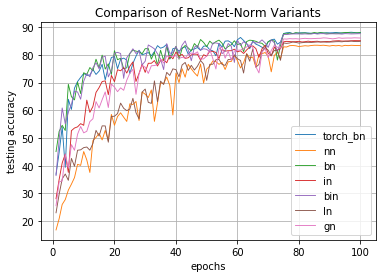

In [31]:
plt.title('Comparison of ResNet-Norm Variants')
plt.xlabel('epochs')
plt.ylabel('testing accuracy')
for i,variant in enumerate(variants):
    test_acc = np.load(variants_path[i])[1]
    epochs=np.arange(1,len(test_acc)+1,1)
    plt.plot(epochs,test_acc,label='%s'%variant,linewidth=0.9)
    plt.grid()
    plt.legend()
plt.savefig(path+'%s'%('comparison_test_acc'), dpi=300)

## quantiles

In [33]:
path+='quantiles/'

In [37]:
a=np.load(path+'nn_quantiles.npy')
a.shape

(100, 4)

In [34]:
path

'./COL870_Assignment1/ForReport/quantiles/'

In [35]:
variants=['torch_bn', 'nn', 'bn', 'in', 'bin', 'ln', 'gn']
variants_path=[path+x+'_quantiles.npy' for x in variants]
variants_path

['./COL870_Assignment1/ForReport/quantiles/torch_bn_quantiles.npy',
 './COL870_Assignment1/ForReport/quantiles/nn_quantiles.npy',
 './COL870_Assignment1/ForReport/quantiles/bn_quantiles.npy',
 './COL870_Assignment1/ForReport/quantiles/in_quantiles.npy',
 './COL870_Assignment1/ForReport/quantiles/bin_quantiles.npy',
 './COL870_Assignment1/ForReport/quantiles/ln_quantiles.npy',
 './COL870_Assignment1/ForReport/quantiles/gn_quantiles.npy']

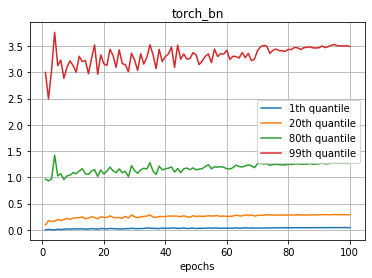

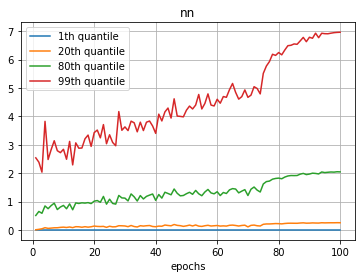

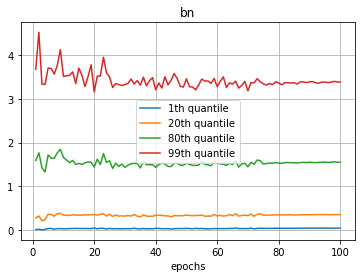

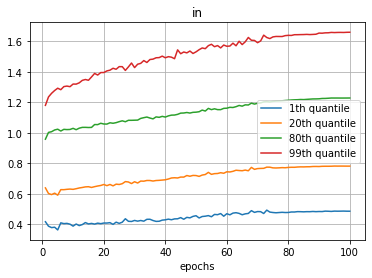

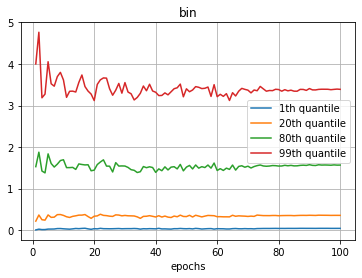

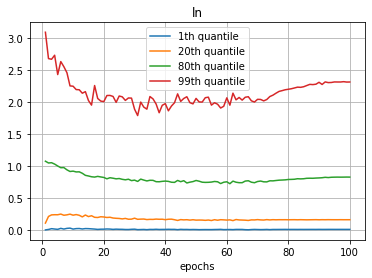

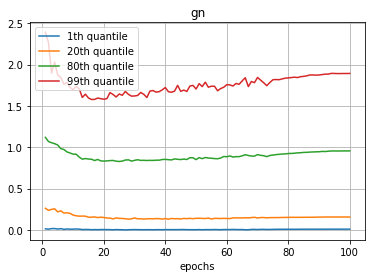

In [41]:
for i,variant in enumerate(variants):
    try:
        plt.clf()
    except Exception as e:
        pass
    plt.title(variant)
    plt.xlabel('epochs')
    q = np.load(variants_path[i])
    epochs=np.arange(1,q.shape[0]+1,1)
    for _,j in enumerate([1,20,80,99]):
        plt.plot(epochs,q[:,_],label='%sth quantile'%j)
    plt.grid()
    plt.legend()
    plt.savefig(path+'%s_quantiles'%(variant), dpi=95)
    plt.show()

# q2 plots

In [2]:
path='./Q2_DL/Experiments/'

In [5]:
first_2_1_1=['BiLSTM_random/', 'BiLSTM_glove/']
second_2_1_3=['BiLSTM_char_glove/', 'BiLSTM_glove/']
third_2_1_4=['BiLSTM_char_glove/', 'BiLSTM_char_glove_layernorm/']

In [6]:
a=np.load(path+first_2_1_1[0]+'train_acclist.npy')
a.shape

(50,)

In [30]:
# def plot(models, metric, train, folder):
#     plt.title('comparison of %s, %s'%(models[0][:-1],models[1][:-1]))
#     plt.xlabel('epochs')
#     plt.ylabel(train+' '+metric)
#     y1 = np.load(path+models[0]+train+'_'+metric+'list.npy')
#     y2 = np.load(path+models[1]+train+'_'+metric+'list.npy')
# #     print(y1.shape,y2.shape)
#     epochs=np.arange(1,51,1)
#     plt.plot(epochs,y1,label='%s'%models[0][:-1])
#     plt.plot(epochs,y2,label='%s'%models[1][:-1])
#     plt.grid()
#     plt.legend()
#     plt.savefig(path+str(folder)+'/%s_vs_%s_%s_%s'%(models[0][:-1],models[1][:-1],train,metric), dpi=95)
#     plt.show()

In [50]:
qns=[first_2_1_1, second_2_1_3, third_2_1_4]
metrics=['acc','microF1','macroF1']
trains=['train','val']
epochs=np.arange(1,51,1)

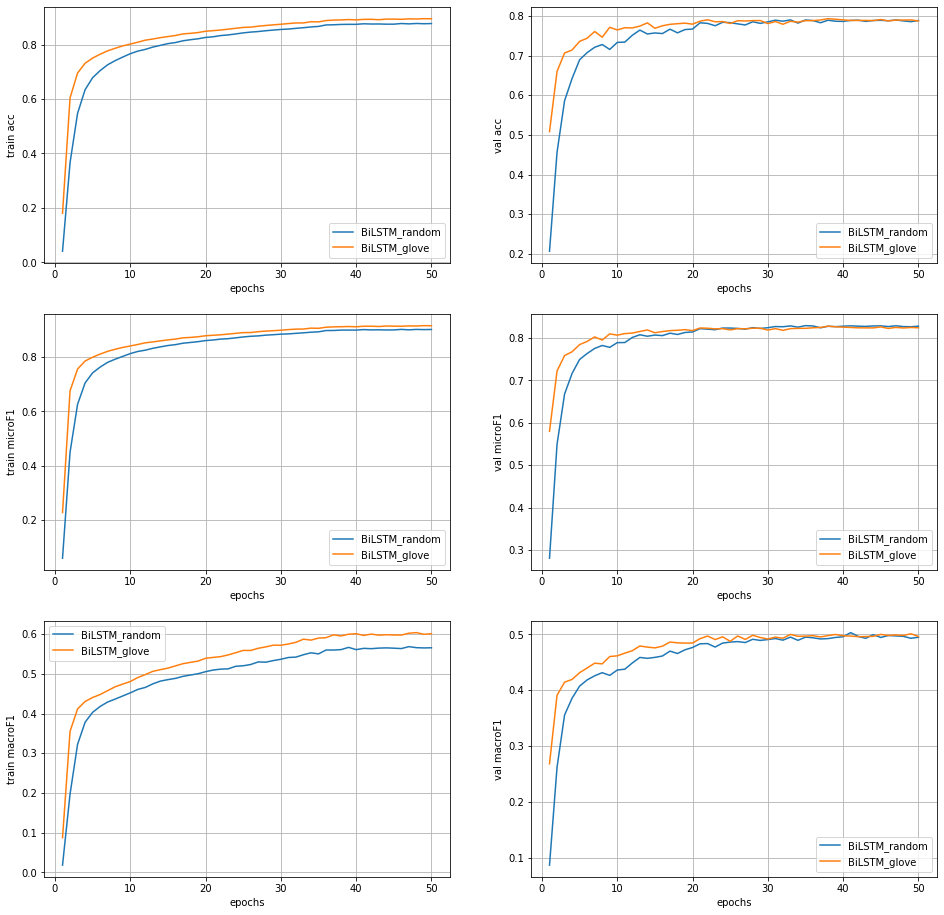

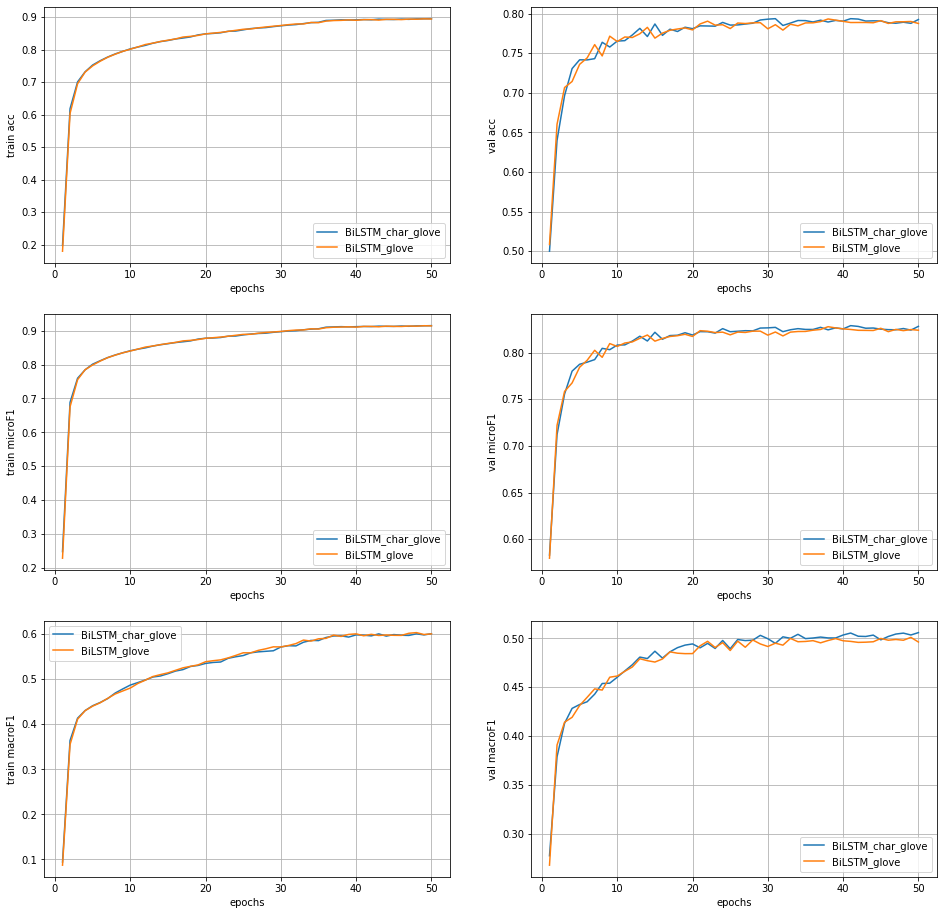

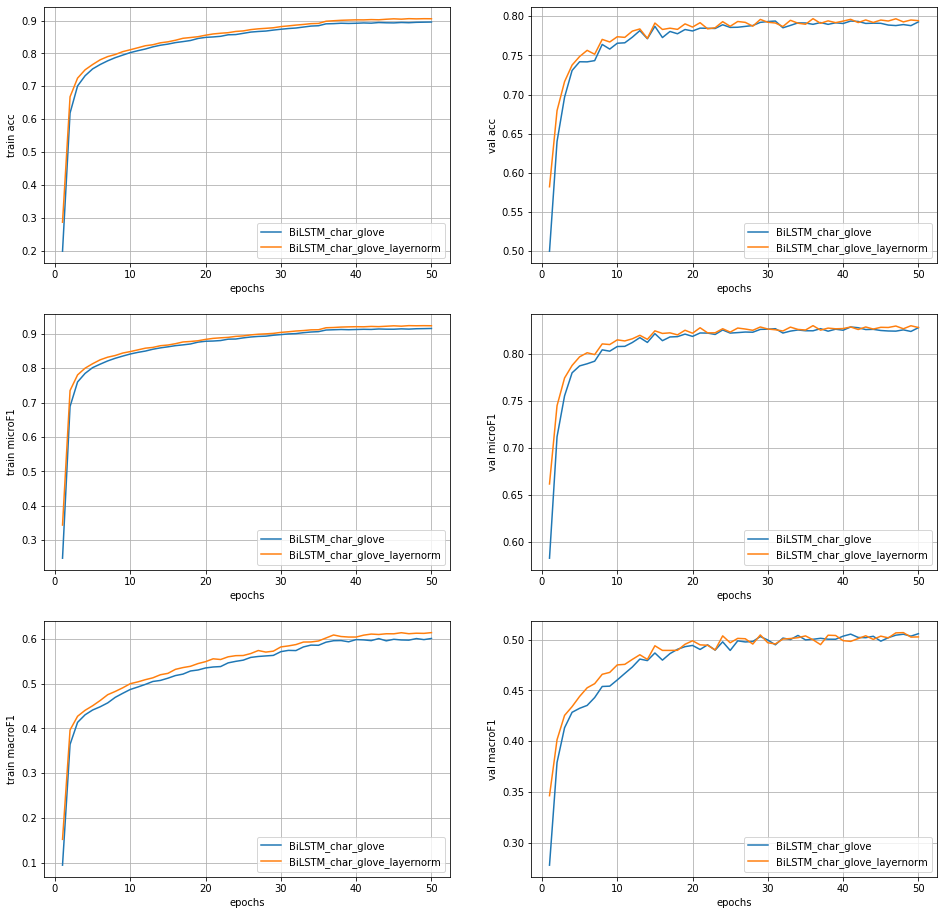

In [51]:
plot_number=1
for models in qns:
    plt.figure(figsize=(16.,16.))
    plt.title('Comparison of %s and %s'%(models[0][:-1],models[1][:-1]))
    for i,metric in enumerate(metrics):
        for j,train in enumerate(trains):
            plt.subplot(3,2,plot_number)
            plot_number=plot_number+1
            plt.xlabel('epochs')
            plt.ylabel(train+' '+metric)
            y1 = np.load(path+models[0]+train+'_'+metric+'list.npy')
            y2 = np.load(path+models[1]+train+'_'+metric+'list.npy')
            plt.plot(epochs,y1,label='%s'%models[0][:-1])
            plt.plot(epochs,y2,label='%s'%models[1][:-1])
            plt.grid()
            plt.legend()
    plt.savefig(path+'%s_vs_%s'%(models[0][:-1],models[1][:-1]), dpi=95)
    plt.show()
    plot_number=1

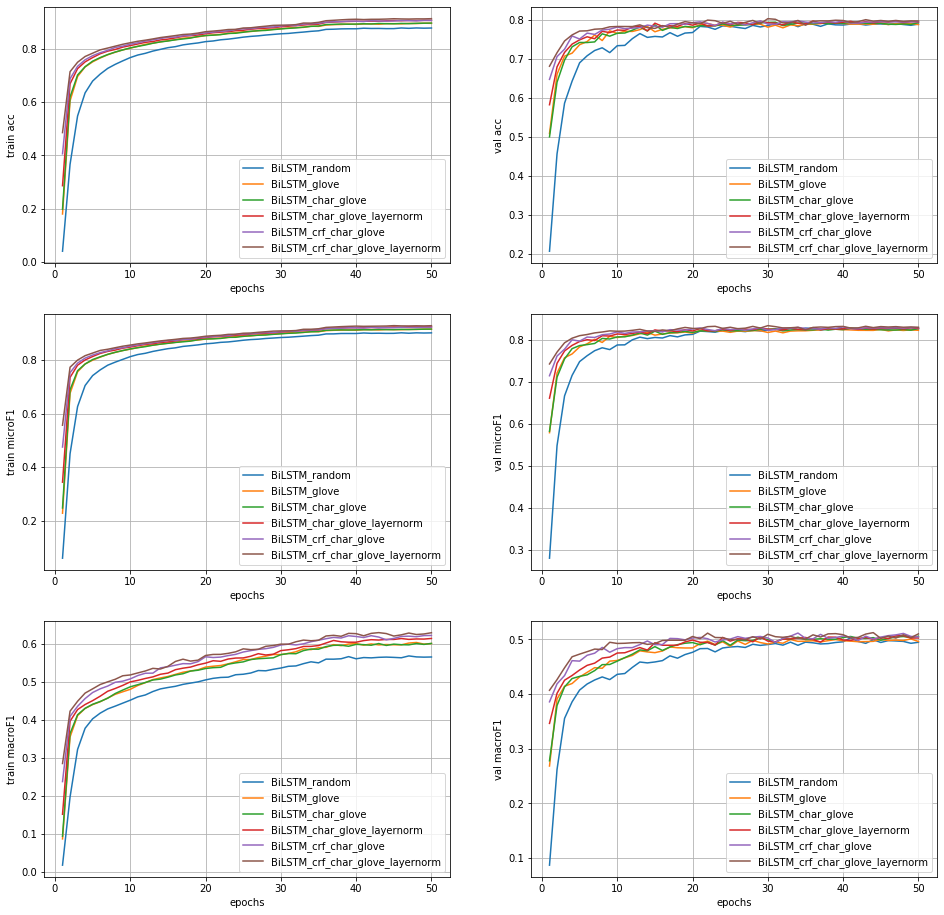

In [54]:
models=['BiLSTM_random/', 'BiLSTM_glove/', 'BiLSTM_char_glove/', 'BiLSTM_char_glove_layernorm/', 'BiLSTM_crf_char_glove/', 'BiLSTM_crf_char_glove_layernorm/']
plt.figure(figsize=(16.,16.))
plot_number=1
for i,metric in enumerate(metrics):
    for j,train in enumerate(trains):
        plt.subplot(3,2,plot_number)
        plot_number=plot_number+1
        plt.xlabel('epochs')
        plt.ylabel(train+' '+metric)
        for model in models:
            y = np.load(path+model+train+'_'+metric+'list.npy')
            plt.plot(epochs,y,label='%s'%model[:-1])
        plt.grid()
        plt.legend()
plt.savefig(path+'2_4', dpi=95)
plt.show()

In [25]:
str(a)

'1'

In [1]:
import pandas as pd
import numpy as np

In [10]:
x=pd.read_csv('bn_Batchsize.txt',header=None, delimiter=' ')

In [11]:
x.head()

,0,1,2,3,4,5,6,7,8
0,epoch,NaN,1,train,acc,34.6500,val,acc,49.57
1,epoch,NaN,2,train,acc,55.0150,val,acc,60.11
2,epoch,NaN,3,train,acc,64.9225,val,acc,71.44
3,epoch,NaN,4,train,acc,70.2525,val,acc,72.06
4,epoch,NaN,5,train,acc,73.3350,val,acc,75.43


In [18]:
x=pd.read_csv('bn_Batchsize.txt',header=None, delimiter=' ')
train_acc=x[5].values
val_acc=x[8].values

In [16]:
a=x[5].values

In [17]:
a.shape

(56,)